Cross section animation of nowcast. Black line to show 1023.3 as reference. 

In [1]:
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import nc_tools, viz_tools, grid_tools, geo_tools, gsw_calls
import matplotlib.pyplot as plt
from matplotlib import animation, rc
%matplotlib inline

In [73]:
rc('animation', html='html5')

In [2]:
NEMO_bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [17]:
hindcast = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn3DTracerFields1hV16-10')

In [63]:
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho

In [80]:
time_slice = slice('2017-06-19 12:00:00', '2017-06-29 12:00:00')

In [34]:
sal = (hindcast.salinity
                 .isel( gridX=155)
                 .sel(time=time_slice))
temp = hindcast.temperature.isel(gridX = 155).sel(time=time_slice)

1.1363636363636362

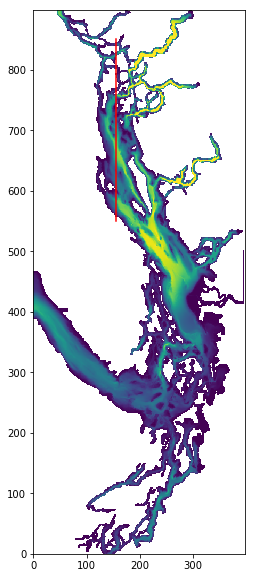

In [36]:
fig, ax = plt.subplots(figsize=(12,10))
ax.pcolormesh(NEMO_bathymetry.variables['Bathymetry'][:])
ax.plot((155,155), (850,550), 'r-')
viz_tools.set_aspect(ax)

In [37]:
sal_values = sal.values
sal_values

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

In [40]:
sal_values.shape

(240, 40, 898)

In [41]:
temp_values = temp.values
temp_values.shape

(240, 40, 898)

In [57]:
depth = hindcast.depth.values

In [58]:
mesh_mask = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

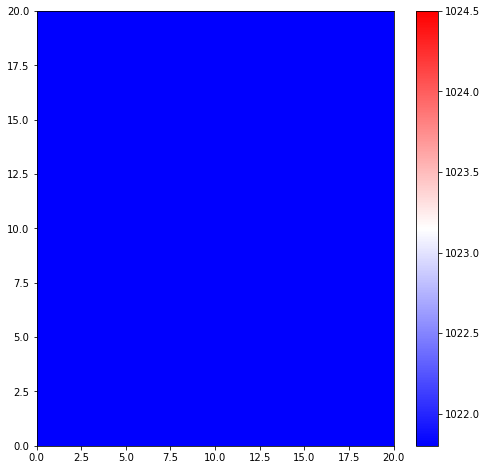

In [65]:
fig, ax = plt.subplots(figsize=(8,8))
ones = ax.pcolormesh(np.ones((20,20)), 
                      vmin = 1021.8, vmax =1024.5, cmap = 'bwr')
fig.colorbar(ones, ax=ax)

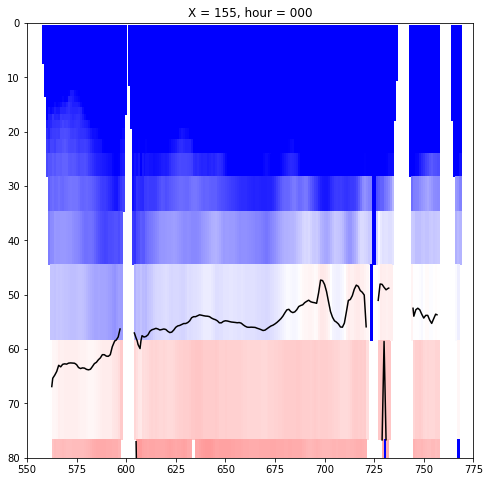

In [79]:
xslice=155
fig,ax = plt.subplots(figsize=(8,8))
xslicemask = 1 - mesh_mask.variables['tmask'][0,:,:, xslice]
def animate30(i):
    ax.clear()
    density1 = calc_rho(sal_values[i,:,:],
                        temp_values[i,:,:],
                        depth[np.newaxis, :, np.newaxis])
    masked_density1 = np.ma.masked_array(density1, mask = xslicemask)
    den = ax.pcolormesh(np.arange(0,898), depth, masked_density1, 
                      vmin = 1021.8,vmax = 1024.5, cmap = 'bwr' #, colors='black'
            )
    ax.contour(np.arange(0,898), depth, masked_density1,levels=[1023.3], colors='black')
    ax.set_ylim(80,0)
    ax.set_xlim(550,775)
    ax.set_title('X = ' + str(xslice) + ', hour = %03d'%(i)) 
    return ax

interval = 0.25#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=240,interval=interval*1e+3, repeat=False)
ani40

(550, 775)

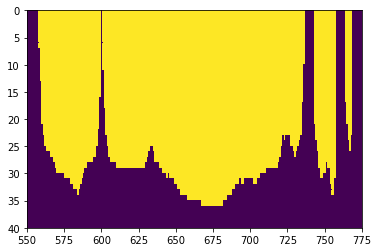

In [78]:
plt.pcolormesh(mesh_mask.variables['tmask'][0,:,:,155])
plt.ylim(40,0)
plt.xlim(550,775)

In [81]:
time_slice2 = slice('2017-05-22 12:00:00', '2017-05-28 12:00:00')
sal2 = (hindcast.salinity.isel( gridX=155).sel(time=time_slice2))
temp2 = hindcast.temperature.isel(gridX = 155).sel(time=time_slice2)
sal_values2 = sal2.values
temp_values2 = temp2.values
print(sal_values2.shape)
print(temp_values2.shape)

(144, 40, 898)
(144, 40, 898)


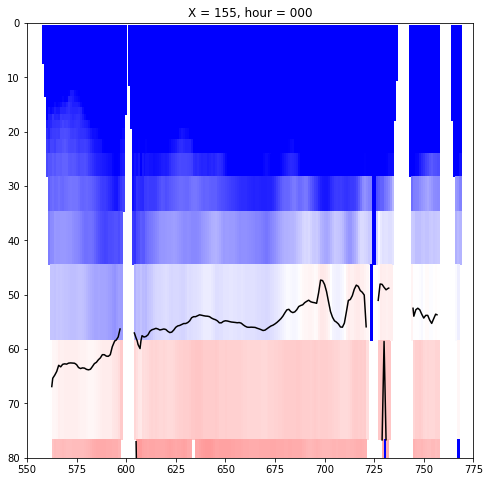

In [82]:
xslice=155
fig,ax = plt.subplots(figsize=(8,8))
xslicemask = 1 - mesh_mask.variables['tmask'][0,:,:, xslice]
def animate30(i):
    ax.clear()
    density1 = calc_rho(sal_values[i,:,:],
                        temp_values[i,:,:],
                        depth[np.newaxis, :, np.newaxis])
    masked_density1 = np.ma.masked_array(density1, mask = xslicemask)
    den = ax.pcolormesh(np.arange(0,898), depth, masked_density1, 
                      vmin = 1021.8,vmax = 1024.5, cmap = 'bwr' #, colors='black'
            )
    ax.contour(np.arange(0,898), depth, masked_density1,levels=[1023.3], colors='black')
    ax.set_ylim(80,0)
    ax.set_xlim(550,775)
    ax.set_title('X = ' + str(xslice) + ', hour = %03d'%(i)) 
    return ax

interval = 0.25#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=144,interval=interval*1e+3, repeat=False)
ani40